### Scipy : high-level scientific computing

scipy is composed of task-specific sub-modules:

|Mold|do|
|--|--|
|scipy.cluster | Vector quantization / Kmeans|
|scipy.constants |Physical and mathematical constants| 
|scipy.fftpack |Fourier transform|
|scipy.integrate |Integration routines|
|scipy.interpolate |Interpolation|
|scipy.io | Data input and output|
|scipy.linalg | Linear algebra routines|
|scipy.ndimage | n-dimensional image package|
|scipy.odr | Orthogonal distance regression|
|scipy.optimize | Optimization|
|scipy.signal | Signal processing|
|scipy.sparse | Sparse matrices|
|scipy.spatial | Spatial data structures and algorithms|
|scipy.special | Any special mathematical functions|
|scipy.stats | Statistics |

In [2]:
import numpy as np
from scipy import stats # same for other sub-modules

### File input/output: `scipy.io`

In [4]:
from scipy import io as spio

a = np.ones((3, 3))

spio.savemat('data/file.mat', {'a': a}) # savemat expects a dictionary

data = spio.loadmat('data/file.mat')
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
# Warning: Python / Matlab mismatches, eg matlab does not represent 1D arrays
a = np.ones(3)
print(a)

spio.savemat('data/file.mat', {'a': a})
spio.loadmat('data/file.mat')['a']

In [ ]:
# import imageio
# imageio.imread('data/fname.png')

# Matplotlib also has a similar function
import matplotlib.pyplot as plt

plt.imread('data/fname.png')

### Linear algebra operations: `scipy.linalg`

In [6]:
# The scipy.linalg.det() function computes the determinant of a square matrix:
from scipy import linalg

arr = np.array([[1, 2],
                    [3, 4]])

linalg.det(arr)
arr = np.array([[3, 2],
                [6, 4]])

linalg.det(arr)
linalg.det(np.ones((3, 4)))

ValueError: expected square matrix

In [7]:
# The scipy.linalg.inv() function computes the inverse of a square matrix:
arr = np.array([[1, 2],
                [3, 4]])

iarr = linalg.inv(arr)
print(iarr)

np.allclose(np.dot(arr, iarr), np.eye(2))

[[-2.   1. ]
 [ 1.5 -0.5]]


True

In [8]:
# Finally computing the inverse of a singular matrix (its determinant is zero) will raise LinAlgError:
arr = np.array([[3, 2],
                [6, 4]])

linalg.inv(arr)

LinAlgError: singular matrix

In [9]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

In [10]:
spec

array([14.88982544,  0.45294236,  0.29654967])

In [11]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

### Interpolation: `scipy.interpolate`

In [12]:
# By imagining experimental data close to a sine function:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

In [19]:
# scipy.interpolate.interp1d can build a linear interpolation function:

from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

In [14]:
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)

In [15]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

### Optimization and fit: `scipy.optimize`

In [20]:
from scipy import optimize

In [21]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

In [22]:
def test_func(x, a, b):
    return a * np.sin(b * x)

In [23]:
params, params_covariance = optimize.curve_fit(test_func, 
                                               x_data, 
                                               y_data, 
                                               p0=[2, 2])

print(params)

[3.17218593 1.49339304]


In [24]:
def f(x):
    return x**2 + 10*np.sin(x)

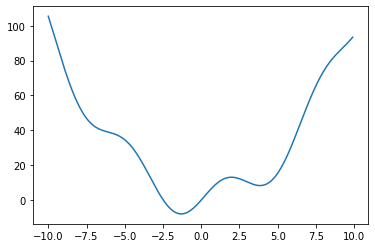

In [25]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))

plt.show()

In [26]:
result = optimize.minimize(f, x0=0)
result

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

In [27]:
result.x

array([-1.30644012])

In [29]:
optimize.minimize(f, 
                  x0=0,
                  method="L-BFGS-B")

      fun: -7.94582337561514
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.68753901e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644017])

In [30]:
res = optimize.minimize(f, x0=3, method="L-BFGS-B")
res.x

array([3.83746709])

In [31]:
optimize.basinhopping(f, 0)

                        fun: -7.945823375615284
 lowest_optimization_result:       fun: -7.945823375615284
 hess_inv: array([[0.08581772]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1014
                        nit: 100
                       njev: 507
                    success: True
                          x: array([-1.30644001])

In [32]:
res = optimize.minimize(f, 
                        x0=1,
                        bounds=((0, 10), ))

res.x

array([0.])

In [33]:
root = optimize.root(f, x0=1) # our initial guess is 1
root # The full result

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([0.])

In [34]:
root.x # Only the root found

array([0.])

In [35]:
root2 = optimize.root(f, x0=-2.5)
root2.x

array([-2.47948183])

### Statistics and random numbers: `scipy.stats`

#### Distributions: histogram and probability density function

[-4 -3 -2 -1  0  1  2  3  4]
[-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]


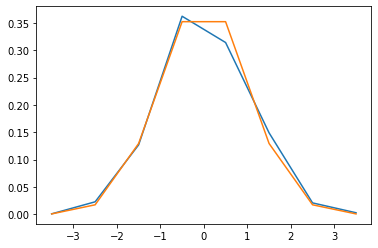

In [37]:
samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)
print(bins)

histogram = np.histogram(samples, 
                         bins=bins, 
                         density=True)[0]

bins = 0.5*(bins[1:] + bins[:-1])
print(bins)

from scipy import stats
pdf = stats.norm.pdf(bins) # norm is a distribution object
plt.plot(bins, histogram)
plt.plot(bins, pdf);

In [38]:
loc, std = stats.norm.fit(samples)
loc

0.008305470332150318

In [39]:
std

1.0041640271090935

#### Mean, median and percentiles

In [40]:
np.mean(samples)

0.008305470332150318

In [41]:
np.median(samples)

-0.0294616584567427

In [42]:
stats.scoreatpercentile(samples, 50)

-0.0294616584567427

In [43]:
stats.scoreatpercentile(samples, 90)

1.2784903183889575

#### Statistical tests

In [44]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)

stats.ttest_ind(a, b)

Ttest_indResult(statistic=-3.9492089176199827, pvalue=0.0001400494102329232)

### Numerical integration: `scipy.integrate`

#### Function integrals

In [45]:
from scipy.integrate import quad

res, err = quad(np.sin, 0, np.pi/2)

np.allclose(res, 1) # res is the result, is should be close to 1
np.allclose(err, 1 - res) # err is an estimate of the err

True

#### Integrating differential equations

In [47]:
def calc_derivative(ypos, time):
    return -2 * ypos

In [48]:
from scipy.integrate import odeint

time_vec = np.linspace(0, 4, 40)
y = odeint(calc_derivative, y0=1, t=time_vec)

In [49]:
mass = 0.5 # kg
kspring = 4 # N/m
cviscous = 0.4 # N s/m

In [50]:
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

In [51]:
eps < 1

True

In [52]:
def calc_deri(yvec, time, eps, omega):
    return (yvec[1], 
            -2.0 * eps * omega * yvec[1] - omega **2 * yvec[0])

In [53]:
time_vec = np.linspace(0, 10, 100)
yinit = (1, 0)

yarr = odeint(calc_deri, 
              yinit, 
              time_vec, 
              args=(eps, omega))

### Fast Fourier transforms: `scipy.fftpack`

In [1]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

Author: Caique Miranda

Github username: caiquemiranda

sys: 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]



### End.